***
***
# The Iris Dataset
***
***

> **WARNING**
>
> Please check that your pip requirements are already installed. Refer to the repository's README file for more details about the installation.

The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish each species. Fisher's paper was published in the Annals of Eugenics (today the Annals of Human Genetics).

> https://en.wikipedia.org/wiki/Iris_flower_data_set

### Libraries

**_Any_ libraries necessary for this Notebook to run will be loaded in the next cell:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import ConfusionMatrixDisplay, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

***
### First Task:
**Load the dataset into a Pandas dataframe, and understand its basic properties**

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris_df = pd.concat([pd.DataFrame(iris.data, columns = iris.feature_names),
                     pd.DataFrame(iris.target, columns = ["target"])],
                    axis = 1)
iris_df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [5]:
# Get basic info for the Iris dataset:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# Get descriptive statistics for the Iris dataset:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Check the classes distribution:
iris_df["target"].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
def print_iris(my_df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
    #Create a custom cmap list. You can find your own colors in:
    # https://matplotlib.org/stable/gallery/color/named_colors.html
    colors = ListedColormap(["darkgreen", "darkblue", "darkmagenta"])
    # Plot sepal length vs sepal width
    scatter = ax1.scatter(my_df.iloc[:, 0], my_df.iloc[:, 1], c = my_df.target, cmap = colors,
                         edgecolors = "black", s = 60)
    legend1 = ax1.legend(handles = scatter.legend_elements()[0], labels = iris.target_names.tolist(),
                         loc = 1, title = "Class", title_fontproperties = {"weight":"bold", "size": "large"},
                         fontsize = "large")
    ax1.add_artist(legend1)
    # Legend configuration from:
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
    ax1.set_xlabel("sepal length (cm)", fontweight = "bold")
    ax1.set_ylabel("sepal width (cm)", fontweight = "bold")
    ax1.set_title("Iris Dataset (1)", fontweight = "bold", fontsize = 18)

    # Plot petal length vs petal width
    scatter2 = ax2.scatter(my_df.iloc[:, 2], my_df.iloc[:, 3], c = my_df.target, cmap = colors,
                         edgecolors = "black", s = 60)
    legend2 = ax2.legend(handles = scatter2.legend_elements()[0], labels = iris.target_names.tolist(),
                         loc = 2, title = "Class", title_fontproperties = {"weight":"bold", "size": "large"},
                         fontsize = "large")
    ax2.add_artist(legend2)
    # Legend configuration from:
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
    ax2.set_xlabel("petal length (cm)", fontweight = "bold")
    ax2.set_ylabel("petal width (cm)", fontweight = "bold")
    ax2.set_title("Iris Dataset (2)", fontweight = "bold", fontsize = 18)

- **Use the above function to plot the dataset:**

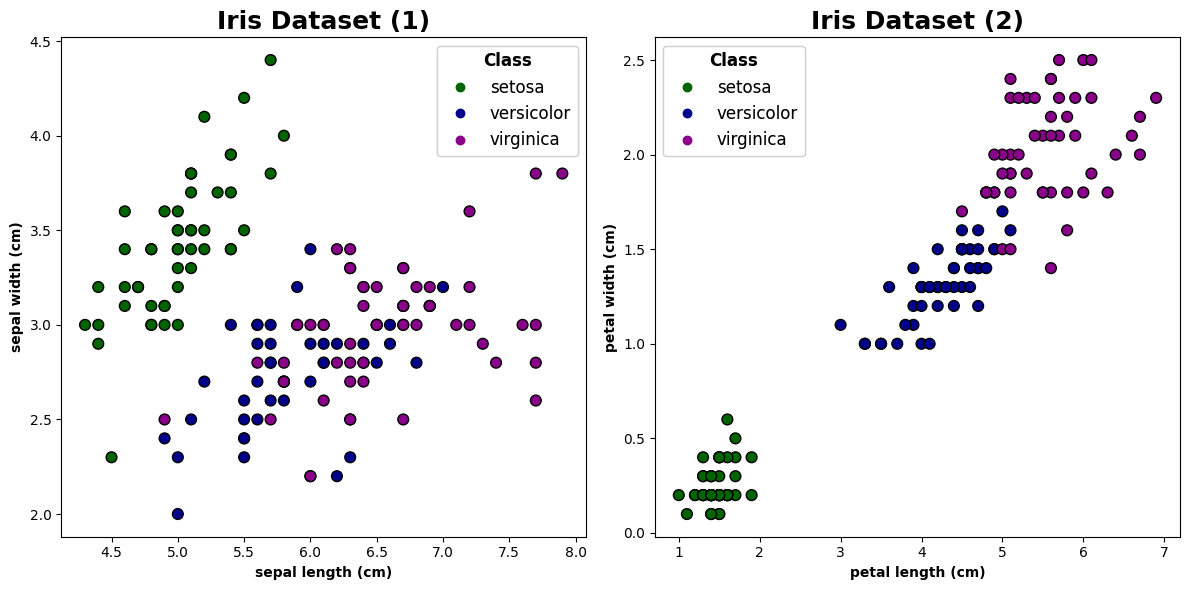

In [9]:
print_iris(iris_df)
plt.tight_layout()
plt.show()

**As we can see, setosa is easily separable from the other two types, versicolor and virginica. We'll try and work with classification methods for the two latter, because setosa can be easily classified with 100% accuracy with most classifiers.**

In [10]:
iris_sepal = iris_df.loc[(iris_df.target == 1) | (iris_df.target == 2),
            ["sepal length (cm)", "sepal width (cm)", "target"]]
iris_petal = iris_df.loc[(iris_df.target == 1) | (iris_df.target == 2),
            ["petal length (cm)", "petal width (cm)", "target"]]

***
### Second Task:
**Classification Methods with Sklearn**

**First, we need to create train and test sets for our two datasets**

In [11]:
X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(iris_sepal.iloc[:, :-1].values,
                                                                            iris_sepal.iloc[:, -1],
                                                                            test_size = 0.2, random_state = 42)
X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(iris_petal.iloc[:, :-1].values,
                                                                            iris_petal.iloc[:, -1],
                                                                            test_size = 0.2, random_state = 42)

**Then, we need to scale/standardize our X sets. StandardScaler works great with most classifiers that require feature scaling.**

In [12]:
sc_sepal = StandardScaler()
sc_petal = StandardScaler()
X_train_sepal_sc = sc_sepal.fit_transform(X_train_sepal)
X_test_sepal_sc = sc_sepal.transform(X_test_sepal)
X_train_petal_sc = sc_petal.fit_transform(X_train_petal)
X_test_petal_sc = sc_petal.transform(X_test_petal)

**And create a function to print our results/scores.**

In [65]:
def print_score(clf_sepal, clf_petal, title, scaling = False):
    # "scaling" variable is Boolean
    if scaling:
        score_table = {
            "Accuracy (test set)": [clf_sepal.score(X_test_sepal_sc, y_test_sepal),
                                    clf_petal.score(X_test_petal_sc, y_test_petal)],
            "Accuracy (CV)": [cross_val_score(clf_sepal, X_train_sepal_sc, y_train_sepal, scoring = "accuracy", cv = 10).mean(),
                              cross_val_score(clf_petal, X_train_petal_sc, y_train_petal, scoring = "accuracy", cv = 10).mean()],
            "Precision (test set)": [precision_score(y_test_sepal, clf_sepal.predict(X_test_sepal_sc)),
                                     precision_score(y_test_petal, clf_petal.predict(X_test_petal_sc))],
            "Precision (CV)": [cross_val_score(clf_sepal, X_train_sepal_sc, y_train_sepal, scoring = "precision", cv = 10).mean(),
                              cross_val_score(clf_petal, X_train_petal_sc, y_train_petal, scoring = "precision", cv = 10).mean()]
        }
    else:
        score_table = {
            "Accuracy (test set)": [clf_sepal.score(X_test_sepal, y_test_sepal),
                                    clf_petal.score(X_test_petal, y_test_petal)],
            "Accuracy (CV)": [cross_val_score(clf_sepal, X_train_sepal, y_train_sepal, scoring = "accuracy", cv = 10).mean(),
                              cross_val_score(clf_petal, X_train_petal, y_train_petal, scoring = "accuracy", cv = 10).mean()],
            "Precision (test set)": [round(precision_score(y_test_sepal, clf_sepal.predict(X_test_sepal)), 2),
                                     precision_score(y_test_petal, clf_petal.predict(X_test_petal))],
            "Precision (CV)": [cross_val_score(clf_sepal, X_train_sepal, y_train_sepal, scoring = "precision", cv = 10).mean(),
                              cross_val_score(clf_petal, X_train_petal, y_train_petal, scoring = "precision", cv = 10).mean()]
        }
    #print("\t\t" + "=====" * 10)
    #print(f"\t\t\t\t{title} Classifier")
    #print("\t\t" + "=====" * 10)
    print(tabulate({"Classifier": [title]}, tablefmt = "double_outline", showindex = ["Classifier:"]))
    print(tabulate(score_table, tablefmt = "double_outline", headers = score_table.keys(), showindex = ["sepal", "petal"]))

- **Bayes Classifier**

In [66]:
nb_sepal = GaussianNB()
nb_petal = GaussianNB()
nb_sepal.fit(X_train_sepal, y_train_sepal)
nb_petal.fit(X_train_petal, y_train_petal)

GaussianNB()

**Accuracy for the test set of the Bayes Classifier:**

In [67]:
print_score(nb_sepal, nb_petal, "Bayes")

╔═════════════╦═══════╗
║ Classifier: ║ Bayes ║
╚═════════════╩═══════╝
╔═══════╦═══════════════════════╦═════════════════╦════════════════════════╦══════════════════╗
║       ║   Accuracy (test set) ║   Accuracy (CV) ║   Precision (test set) ║   Precision (CV) ║
╠═══════╬═══════════════════════╬═════════════════╬════════════════════════╬══════════════════╣
║ sepal ║                  0.65 ║          0.6875 ║               0.67     ║         0.701667 ║
║ petal ║                  0.9  ║          0.95   ║               0.916667 ║         0.955    ║
╚═══════╩═══════════════════════╩═════════════════╩════════════════════════╩══════════════════╝


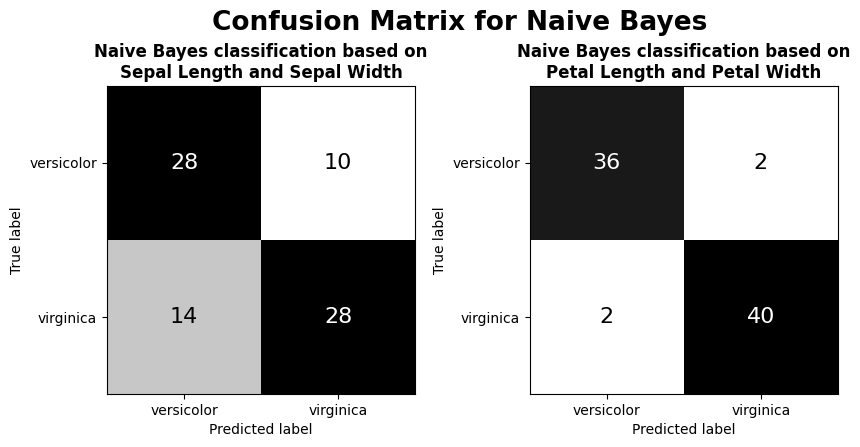

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
cm_nb_sepal = ConfusionMatrixDisplay.from_estimator(nb_sepal, X_train_sepal, y_train_sepal,
                                                    display_labels = iris.target_names.tolist()[1:],
                                                    ax = ax1, cmap = "binary", colorbar = False,
                                                    text_kw = {"fontsize": 16})
ax1.set_title("Naive Bayes classification based on\nSepal Length and Sepal Width", fontweight = "bold")
cm_nb_petal = ConfusionMatrixDisplay.from_estimator(nb_petal, X_train_petal, y_train_petal,
                                                    display_labels = iris.target_names.tolist()[1:],
                                                    ax = ax2, cmap = "binary", colorbar = False,
                                                    text_kw = {"fontsize": 16})
ax2.set_title("Naive Bayes classification based on\nPetal Length and Petal Width", fontweight = "bold")
plt.suptitle("Confusion Matrix for Naive Bayes", y = 1.07, fontweight = "bold", fontsize = 19)
plt.show()

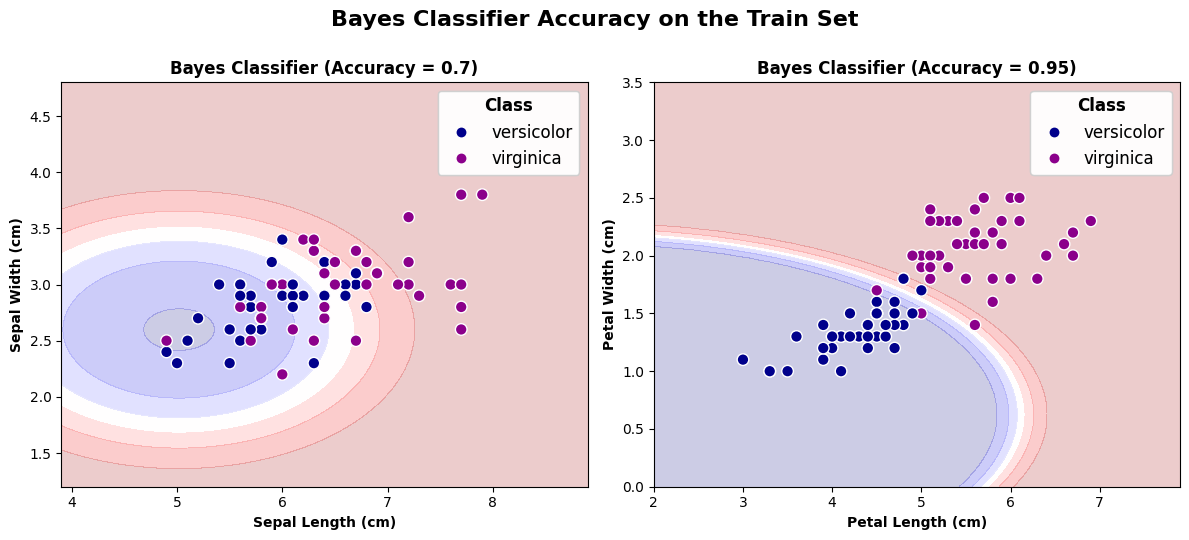

In [43]:
def decision_boundary(clf, ax, X_train, y_train, xaxis_title, yaxis_title, title):
    colors = ListedColormap(["darkblue", "darkmagenta"])
    #fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    DecisionBoundaryDisplay.from_estimator(clf, X_train, ax = ax, plot_method = "contourf",
                                          cmap = "seismic", alpha = 0.2, zorder = 0)
    scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap = colors, s = 70, edgecolors="white")
    legend1 = ax.legend(handles = scatter.legend_elements()[0], labels = iris.target_names.tolist()[1:],
                         loc = 1, title = "Class", title_fontproperties = {"weight":"bold", "size": "large"},
                         fontsize = "large")
    ax.add_artist(legend1)
    ax.set_xlabel(xaxis_title, fontweight = "bold")
    ax.set_ylabel(yaxis_title, fontweight = "bold")
    ax.set_title(title + " (Accuracy = " + str(clf.score(X_train, y_train)) + ")", fontweight = "bold", fontsize = 12)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
decision_boundary(nb_sepal, ax1, X_train_sepal, y_train_sepal, "Sepal Length (cm)", "Sepal Width (cm)",
                  "Bayes Classifier")
plt.subplot(1, 2, 2)
decision_boundary(nb_petal, ax2, X_train_petal, y_train_petal, "Petal Length (cm)", "Petal Width (cm)",
                  "Bayes Classifier")
plt.tight_layout()
plt.suptitle("Bayes Classifier Accuracy on the Train Set", y = 1.07, fontweight = "bold", fontsize = 16)
plt.show()

- **K-Nearest Neighbors**

Some Classification algorithms require hyper-parameter tuning. For example, in KNN, we need to decide the number of neighbors that will _vote_ for the classification of a new data point.

In cases that we need hyper-parameter tuning, we'll use Sklearn's GridSearchCV to find the best parameters. Keep in mind that GridSearchCV's answers won't necessarily be the best ones for unseen data, and it may require some trial and error testing from our part.

For the classification based on Sepal Length and Sepal Width we get a relatively low accuracy score when using the default number of neighbors for Sklearns KNN classifier (n = 5). That's why we implemented a GridSearchCV first.

In [44]:
param_grid = {
    "n_neighbors": [_ for _ in range(2, 10)]
}
knn_grid_sepal = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = "accuracy", cv = 5)
knn_grid_sepal.fit(X_train_sepal_sc, y_train_sepal)
knn_grid_sepal.best_params_

{'n_neighbors': 6}

In [45]:
knn_grid_petal = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = "accuracy", cv = 5)
knn_grid_petal.fit(X_train_petal_sc, y_train_petal)
knn_grid_petal.best_params_

{'n_neighbors': 5}

In [46]:
knn_sepal = KNeighborsClassifier(n_neighbors = 6)
knn_petal = KNeighborsClassifier()
knn_sepal.fit(X_train_sepal_sc, y_train_sepal)
knn_petal.fit(X_train_petal_sc, y_train_petal)

KNeighborsClassifier()

In [47]:
print_score(knn_sepal, knn_petal, "K-Nearest Neighbors", scaling = True)

				K-Nearest Neighbors Classifier
╔═══════╦═══════════════════════╦═════════════════╦════════════════════════╦══════════════════╗
║       ║   Accuracy (test set) ║   Accuracy (CV) ║   Precision (test set) ║   Precision (CV) ║
╠═══════╬═══════════════════════╬═════════════════╬════════════════════════╬══════════════════╣
║ sepal ║                  0.6  ║            0.65 ║               0.642857 ║         0.631667 ║
║ petal ║                  0.95 ║            0.95 ║               0.923077 ║         0.955    ║
╚═══════╩═══════════════════════╩═════════════════╩════════════════════════╩══════════════════╝


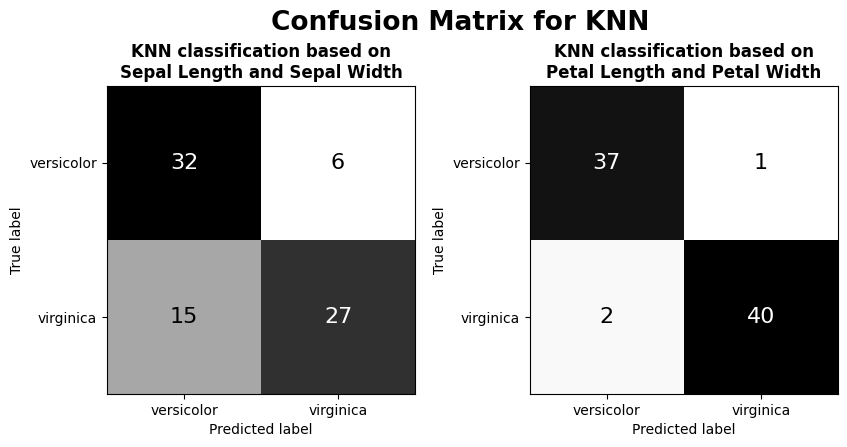

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
cm_knn_sepal = ConfusionMatrixDisplay.from_estimator(knn_sepal, X_train_sepal_sc, y_train_sepal,
                                                    display_labels = iris.target_names.tolist()[1:],
                                                    ax = ax1, cmap = "binary", colorbar = False,
                                                    text_kw = {"fontsize": 16})
ax1.set_title("KNN classification based on\nSepal Length and Sepal Width", fontweight = "bold")
cm_knn_petal = ConfusionMatrixDisplay.from_estimator(knn_petal, X_train_petal_sc, y_train_petal,
                                                    display_labels = iris.target_names.tolist()[1:],
                                                    ax = ax2, cmap = "binary", colorbar = False,
                                                    text_kw = {"fontsize": 16})
ax2.set_title("KNN classification based on\nPetal Length and Petal Width", fontweight = "bold")
plt.suptitle("Confusion Matrix for KNN", y = 1.07, fontweight = "bold", fontsize = 19)
plt.show()

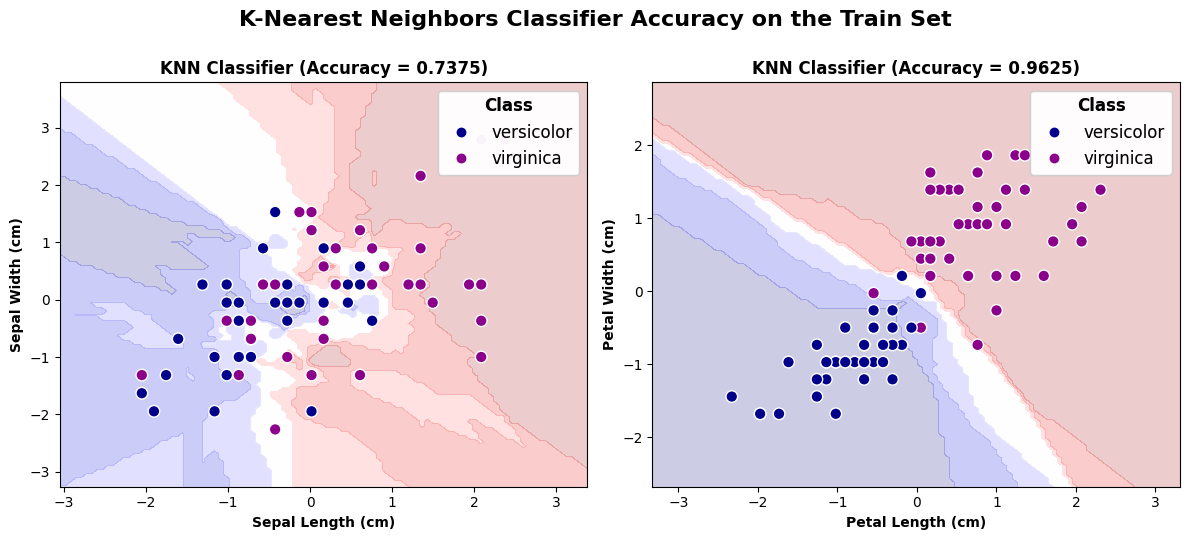

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
decision_boundary(knn_sepal, ax1, X_train_sepal_sc, y_train_sepal, "Sepal Length (cm)", "Sepal Width (cm)",
                  "KNN Classifier")
plt.subplot(1, 2, 2)
decision_boundary(knn_petal, ax2, X_train_petal_sc, y_train_petal, "Petal Length (cm)", "Petal Width (cm)",
                  "KNN Classifier")
plt.tight_layout()
plt.suptitle("K-Nearest Neighbors Classifier Accuracy on the Train Set", y = 1.07, fontweight = "bold", fontsize = 16)
plt.show()

- #### SVM Classifier